In [1017]:
import pandas as pd
import seaborn as sns=
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

### Data collection and Analysis

In [1019]:
insurance_dataset = pd.read_csv("insurance.csv")
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Getting info about the dataset

In [1021]:
insurance_dataset['region'].unique() 

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [1022]:
insurance_dataset.shape

(1338, 7)

In [1023]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1024]:
insurance_dataset['sex'].value_counts(normalize=True)

sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64

**Categorical features:**

* **Sex**
* **Smoker** 
* **Region** 


**Target feature:**

* **charges**



### Statistics 

In [1027]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


-- 25% of age is less than 27 

-- 50% of age is less than 39 

### Finding the distribution of the dataset 

<Figure size 600x600 with 0 Axes>

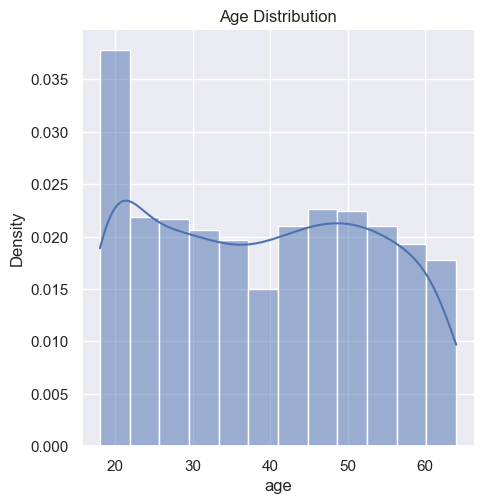

In [1030]:
sns.set()
plt.figure(figsize = (6,6))
sns.displot(insurance_dataset['age'], kde=True, stat='density')
plt.title('Age Distribution')
plt.show()

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_77538/794804991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=insurance_dataset, palette="pastel")


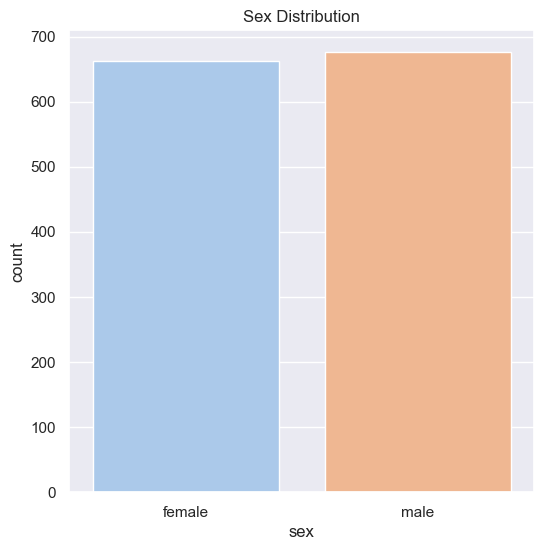

In [1031]:
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=insurance_dataset, palette="pastel")  
plt.title('Sex Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

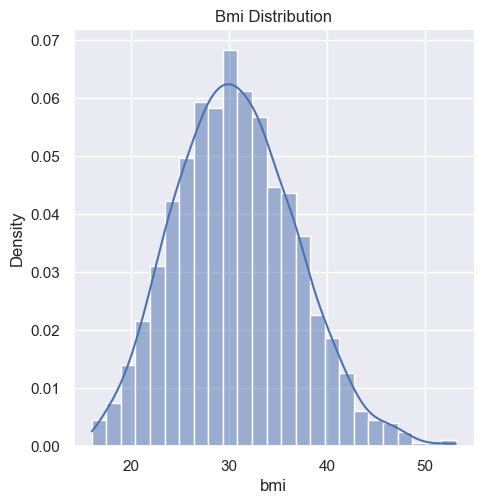

In [1032]:
sns.set()
plt.figure(figsize = (6,6))
sns.displot(insurance_dataset['bmi'], kde=True, stat='density')
plt.title('Bmi Distribution')
plt.show()

-- Normal Bmi range is <---  18 to 24 

In [1034]:
insurance_dataset['children'].value_counts(normalize=True)

children
0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: proportion, dtype: float64

In [1035]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

### Smokers 

In [1037]:
insurance_dataset['smoker'].value_counts(normalize=True)

smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64

In [1038]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_77538/4049603088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'region' , data = insurance_dataset , palette="pastel")


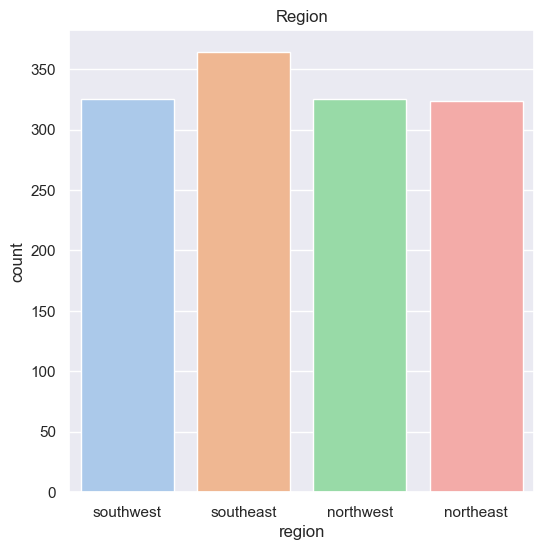

In [1039]:
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x = 'region' , data = insurance_dataset , palette="pastel")
plt.title('Region')
plt.show()

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_77538/1625560576.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


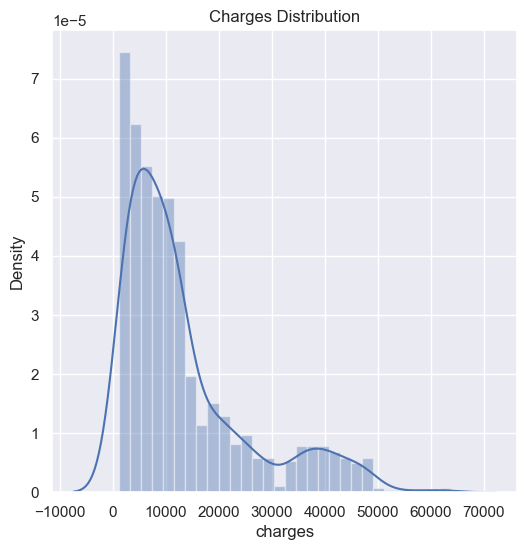

In [1040]:
plt.figure(figsize= (6, 6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

### Data Preprocessing

#### Encoding the categorical features 

In [1043]:
# encoding sex column
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

# encoding 'smoker' column
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_77538/1678262072.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_77538/1678262072.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_77538/1678262072.py:8: FutureWarning: Downcasting behavior in `replace` i

In [1044]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


### Apply Log Transformation on (charges)

In [1045]:
insurance_dataset['charges'] = np.log1p(insurance_dataset['charges'])

In [1046]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


### Splitting the features and target

In [1048]:
X = insurance_dataset.drop(columns = 'charges' ,axis = 1 ) 
Y = insurance_dataset['charges']

# axis = 1 for columns
# axis = 0 for rows 


In [1049]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [1050]:
Y

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1338, dtype: float64

### Splitting the data into training data and testing data 

In [1052]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)



In [1053]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1003, 6) (335, 6)


In [1054]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1338,) (1003,) (335,)


### Model Training 

#### Linear Regression

In [1057]:
# load the Linear Regression model
regressor = LinearRegression()


In [1058]:
regressor.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [1060]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)


In [1061]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale :', r2_train)


R squared vale : 0.7626375060320405


In [1062]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)


In [1063]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale :', r2_test)

R squared vale : 0.7758544369866787


-- R squared vale : 0.7626375060320405

-- R squared vale : 0.7758544369866787

-- Since both of R2 values are pretty much close to each other , we dont have any overfitting problem.


## Building A predictive system

In [1066]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,9.734236
1,18,0,33.770,1,1,0,7.453882
2,28,0,33.000,3,1,0,8.400763
3,33,0,22.705,0,1,3,9.998137
4,32,0,28.880,0,1,3,8.260455
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,9.268755
1334,18,1,31.920,0,1,2,7.699381
1335,18,1,36.850,0,1,0,7.396847
1336,21,1,25.800,0,1,1,7.605365


In [1067]:
random_rows = insurance_dataset.sample(n=2)  # Selects random rows
random_rows

,age,sex,bmi,children,smoker,region,charges
188,41,1,32.2,1,1,1,8.821284
216,53,1,26.6,0,1,3,9.245383


In [1116]:
log_charges = [8.821284]

# Get the original charges by applying the exponential function (exp)
original_charges = np.exp(log_charges)
print("Original charges:", original_charges)

# Change tuple input data into numpy array
input_data = (41,1,32.2,1,1,1)
input_data_as_np = np.asarray(input_data)


#{'sex': {'male': 0, 'female': 1}}

#{'smoker': {'yes': 0, 'no': 1}}

#{'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}


# Reshape the array
input_data_reshaped = input_data_as_np.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)

# Convert prediction back to the original scale
prediction = np.exp(prediction)  

# Print the correct insurance cost
print("The insurance cost is USD", prediction)

Original charges: [6776.96065871]
The insurance cost is USD [7158.64647283]


/Users/kyawphonezaw/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Save the Model


In [1128]:
import joblib
joblib.dump(regressor, 'medi_insurance_model.pkl')

['medi_insurance_model.pkl']